In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from textwrap import wrap

In [2]:
llama_13_df = pd.read_excel("Scored_Llama-2-13b-german-promp-template.xlsx")
sk8x7B = pd.read_excel("Scored_SauerkrautLM-Mixtral-8x7B-Instruct-german-promp-template.xlsx")

In [3]:
llama_13_df.columns

Index(['Unnamed: 0', 'question', 'contexts', 'ground_truth', 'answer',
       'retrieve_methods', 'Score', 'chunk_strategie'],
      dtype='object')

In [4]:
llama_13_df.drop(labels = ["Unnamed: 0"],axis=1,inplace = True)
sk8x7B.drop(labels = ["Unnamed: 0"],axis=1,inplace = True)

In [14]:
concated_df = pd.concat([llama_13_df, sk8x7B])
concated_df

,question,contexts,ground_truth,answer,retrieve_methods,Score,chunk_strategie
0,Wie hat Bayer Leverkusen am 2023-11-25 der Bun...,[],Bayer Leverkusen hat 3:0 gegen Bremen gewonnen.,Bayer Leverkusen hat am 25. November 2023 in d...,[],0,"(508, 170)"
1,Wie hat Bayer Leverkusen am 2023-11-25 der Bun...,['11. dezember startet schalke 04 den ticket -...,Bayer Leverkusen hat 3:0 gegen Bremen gewonnen.,2023-11-25 war ein Spieltag der Bundesliga-Hin...,['keyword'],0,"(508, 170)"
2,Wie hat Bayer Leverkusen am 2023-11-25 der Bun...,['##uck und heuerte bei noch - bundesligist fc...,Bayer Leverkusen hat 3:0 gegen Bremen gewonnen.,Bayer Leverkusen hat am 25. November 2023 in d...,['similarity'],0,"(508, 170)"
3,Wie hat Bayer Leverkusen am 2023-11-25 der Bun...,['landerspielpause hat der fußball - bundeslig...,Bayer Leverkusen hat 3:0 gegen Bremen gewonnen.,2023-11-25 war ein Freitag. Der Spieltag der B...,['time_weighted'],0,"(508, 170)"
4,Wie hat Bayer Leverkusen am 2023-11-25 der Bun...,['fruhere bundestrainer berti vogts schlagt fu...,Bayer Leverkusen hat 3:0 gegen Bremen gewonnen.,"25. November 2023, 15:30 Uhr, BayArena, Leverk...",['metadata'],0,"(508, 170)"
...,...,...,...,...,...,...,...
523,Wer wurde im Spiel Leverkusen gegen Bremen am ...,['saison weiter ungeschlagenen leverkusener ha...,Auf der Seite von Bremen wurde Olivier Deman ...,1. Oliver deman wurde in der 77. Minute für Ni...,"['keyword', 'similarity', 'time_weighted']",0,"(128, 42)"
524,Wer wurde im Spiel Leverkusen gegen Bremen am ...,['saison weiter ungeschlagenen leverkusener ha...,Auf der Seite von Bremen wurde Olivier Deman ...,1. Oliver deman wurde in der 62. Minute für Ni...,"['keyword', 'similarity', 'metadata']",0,"(128, 42)"
525,Wer wurde im Spiel Leverkusen gegen Bremen am ...,['leverkusen hat die tabellenfuhrung in der fu...,Auf der Seite von Bremen wurde Olivier Deman ...,1. Halbzeit: 46. Minute: Niclas Füllkrug für M...,"['keyword', 'time_weighted', 'metadata']",0,"(128, 42)"
526,Wer wurde im Spiel Leverkusen gegen Bremen am ...,['leverkusen hat die tabellenfuhrung in der fu...,Auf der Seite von Bremen wurde Olivier Deman ...,"Die Spieler, die in diesem Spiel ausgewechselt...","['similarity', 'time_weighted', 'metadata']",0,"(128, 42)"


In [15]:
grouped = concated_df.groupby('retrieve_methods')['Score'].agg(['sum', 'mean'])

In [16]:
grouped.sort_values("mean", inplace=True)

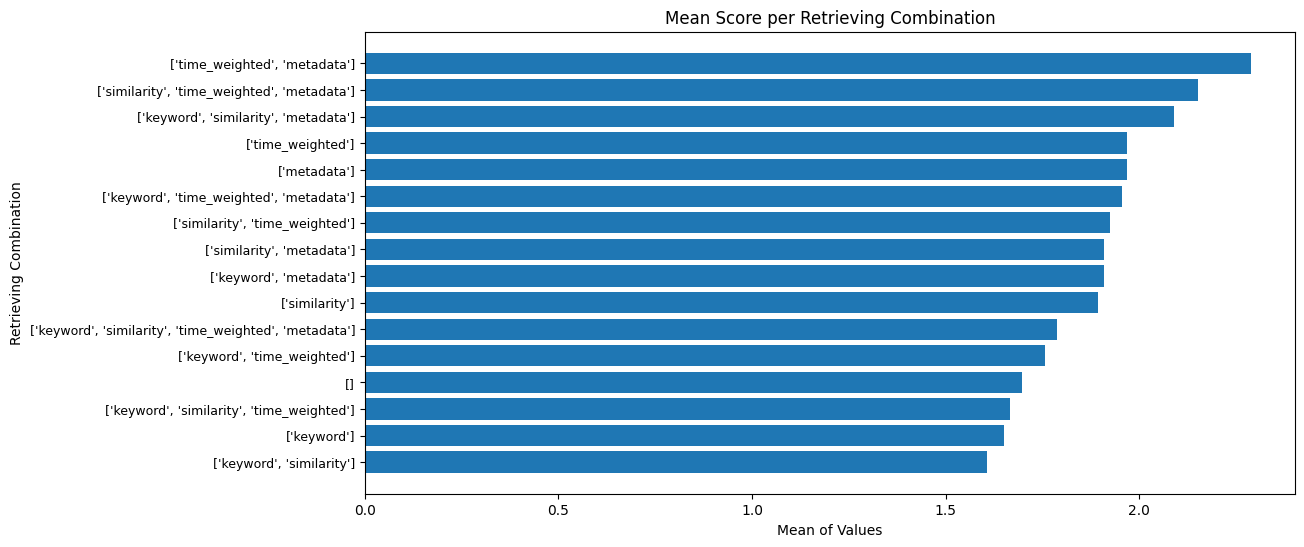

In [19]:
# Matplotlib Horizontal Plot for Mean
plt.figure(figsize=(12, 6))
plt.barh(grouped.index, grouped['mean'], #color='orange'
         )
plt.xlabel('Mean of Values')
plt.ylabel('Retrieving Combination')
plt.title('Mean Score per Retrieving Combination')
plt.yticks(fontsize = 9)
plt.show()

In [25]:
import numpy as np
from matplotlib.colors import to_rgba

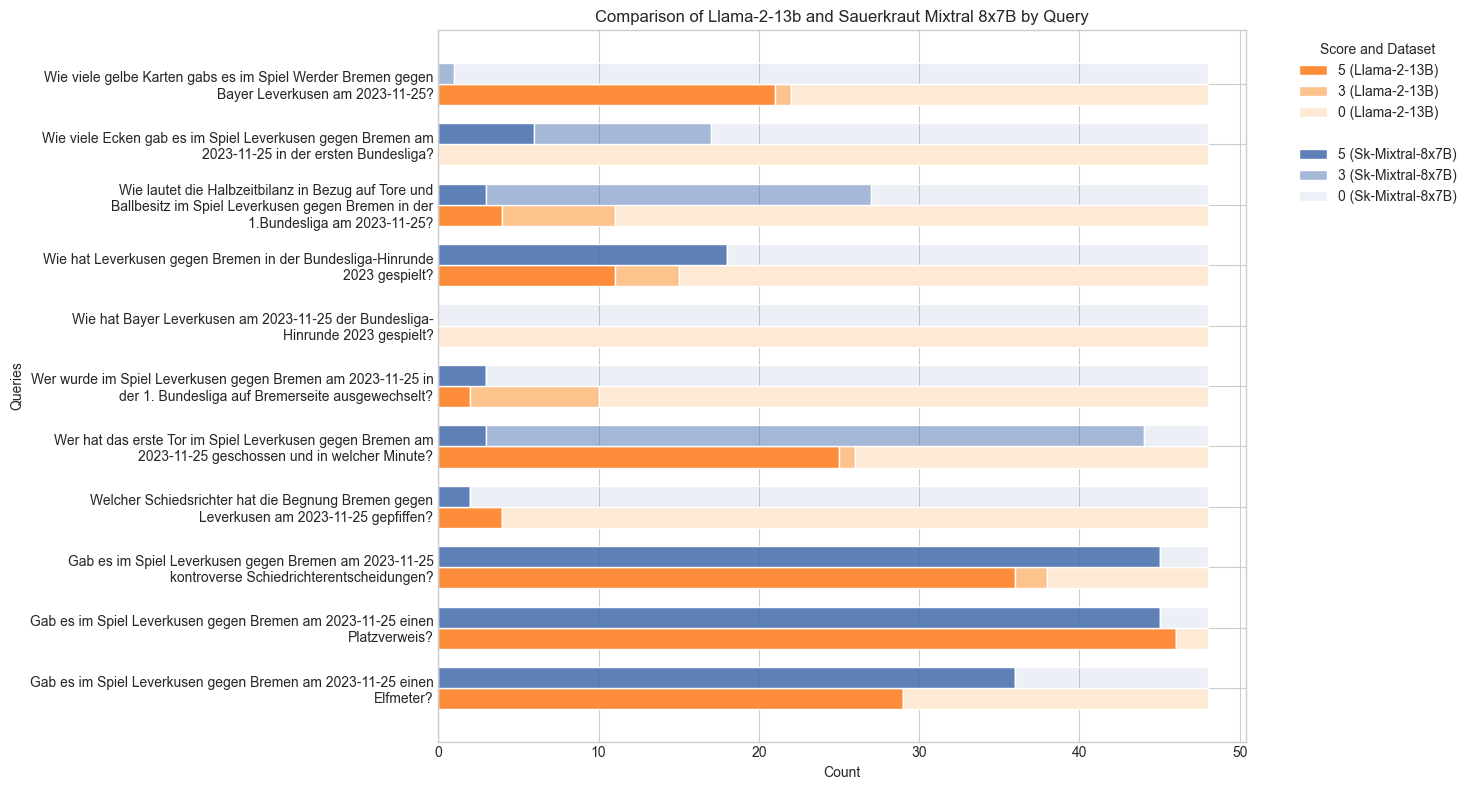

In [28]:
pivot_df1 = llama_13_df.groupby(['question', 'Score']).size().unstack(fill_value=0)
pivot_df2 = sk8x7B.groupby(['question', 'Score']).size().unstack(fill_value=0)

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Number of retrieve_methods
n_methods = len(pivot_df1.index)
bar_width = 0.35

# Positions of the bars on the y-axis
indices = np.arange(n_methods)

# Define color schemes for datasets
colors1 = plt.cm.Oranges(np.linspace(0.1, 0.5, len(pivot_df1.columns)))
base_color_blue = to_rgba('#4c72b0')
colors2 = [(*base_color_blue[:3], alpha) for alpha in np.linspace(0.1, 0.9, len(pivot_df2.columns))]

# Plotting data from the first dataset in reverse order
bottoms = np.zeros(n_methods)
legend_handles = []  # For custom legend
for score, color in zip(pivot_df1.columns[::-1], colors1[::-1]):  # reverse the iteration
    bars = ax.barh(indices - bar_width/2, pivot_df1[score], height=bar_width, left=bottoms, color=color, edgecolor= 'white')
    bottoms += pivot_df1[score].values
    legend_handles.append(bars[0])  # Add only the first bar for legend

# Add a separator in the legend between datasets
legend_handles.append(plt.Rectangle((0,0),1,1,fc="w", edgecolor='white', linewidth=0))

# Plotting data from the second dataset in reverse order
bottoms = np.zeros(n_methods)
for score, color in zip(pivot_df2.columns[::-1], colors2[::-1]):  # reverse the iteration
    bars = ax.barh(indices + bar_width/2, pivot_df2[score], height=bar_width, left=bottoms, color=color,  edgecolor= 'white')
    bottoms += pivot_df2[score].values
    legend_handles.append(bars[0])  # Add only the first bar for legend

# Add labels and title

ax.set_xlabel('Count')
ax.set_ylabel('Queries')
# Modify y-axis labels to include line breaks
wrapped_labels = ['\n'.join(wrap(label, 60)) for label in pivot_df1.index]  # Adjust 10 to desired wrap length
ax.set_yticks(indices)
ax.set_yticklabels(wrapped_labels)
ax.set_title('Comparison of Llama-2-13b and Sauerkraut Mixtral 8x7B by Query')

# Create custom legend labels
legend_labels = [f'{score} (Llama-2-13B)' for score in pivot_df1.columns[::-1]] + [''] + \
                [f'{score} (Sk-Mixtral-8x7B)' for score in pivot_df2.columns[::-1]]
# legend_labels = [f'{score} (Sk-Mixtral-8x7B)' for score in pivot_df2.columns[::-1]] + [''] + \
#                 [f'{score} (Llama-2-13B)' for score in pivot_df1.columns[::-1]]
# Create custom legend
#ax.legend(legend_handles, pivot_df1.columns[::-1].tolist() + [''] + pivot_df2.columns[::-1].tolist(), title='Score', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(legend_handles, legend_labels, title='Score and Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

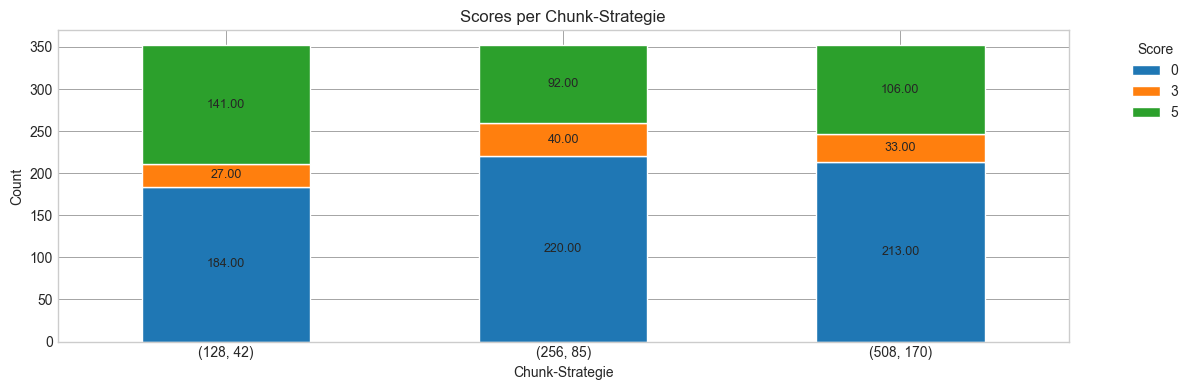

In [30]:
# Pivot the DataFrame
pivot_df = concated_df.groupby(['chunk_strategie', 'Score']).size().unstack(fill_value=0)

# Plotting with adjusted figure size for a bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 4), edgecolor= 'white')  # Vertical stacked bar chart
plt.title('Scores per Chunk-Strategie')
plt.xlabel('Chunk-Strategie')
plt.ylabel('Count')


# Place the legend outside of the plot
plt.legend(title='Score', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# Loop through each patch (rectangle/bar segment) in the bar containers
for container in ax.containers:
    # The container has all the bars for one score
    for bar in container:
        # Find the height to position the annotation correctly
        height = bar.get_height()
        if height > 0:  # Only annotate if there is a visible bar segment
            ax.annotate(f'{height:.2f}',  # The annotation text
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),  # Position
                        xytext=(0, 0),  # No offset
                        textcoords="offset points",
                        ha='center', va='center',
                        fontsize =9)
# Add black grid
ax.grid(True, color='grey', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

C:\Users\Programming\AppData\Local\Temp\ipykernel_21864\3906526332.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # White background with a grid


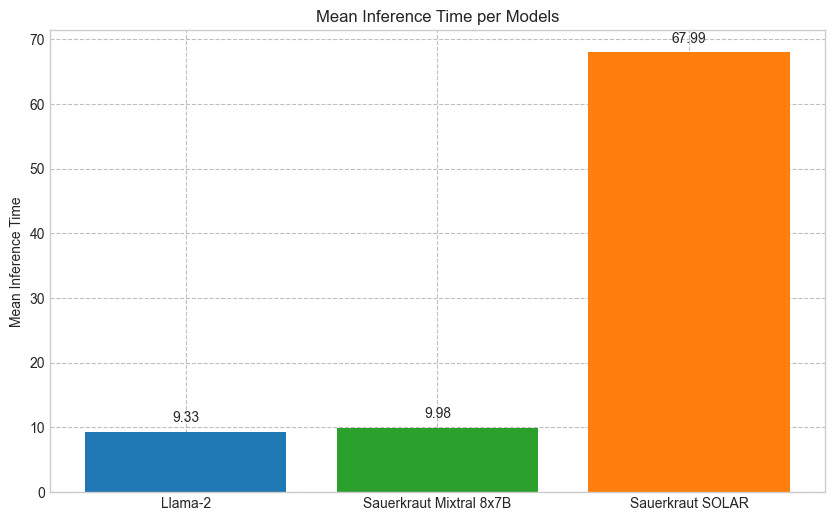

In [27]:
import matplotlib.pyplot as plt

# The data values
names = ["Llama-2", "Sauerkraut Mixtral 8x7B", "Sauerkraut SOLAR"]
scores = [9.330094387200832, 9.984682745140438, 67.9940106862782]

# The colors specified from the provided chart
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']  # Blue, Green, Orange hex codes

# Setting the style
plt.style.use('seaborn-whitegrid')  # White background with a grid

# Creating the bar chart with the specified colors and style
plt.figure(figsize=(10, 6))
bars = plt.bar(names, scores, color=colors)

# Adding labels and title
#plt.xlabel('Dataset')
plt.ylabel('Mean Inference Time')
plt.title('Mean Inference Time per Models')

# Customizing the grid
plt.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

# Adding the data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Show plot
plt.show()

